<a href="https://colab.research.google.com/github/samsung-ai-course/6-7-edition/blob/main/Supervised%20Learning/multi_class_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

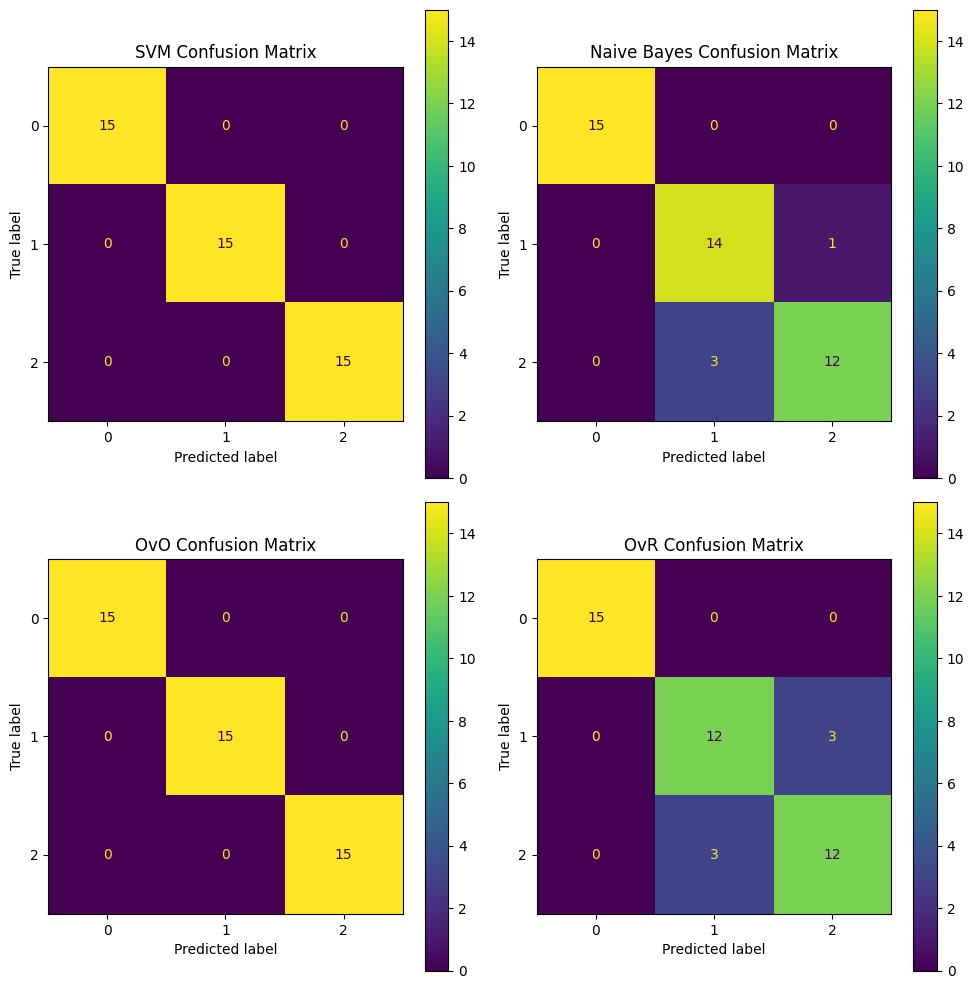

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Multiclass Classification using SVM and Naive Bayes
svm_model = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)
nb_model = GaussianNB()

# Train models
svm_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Predictions
svm_preds = svm_model.predict(X_test)
nb_preds = nb_model.predict(X_test)

# Evaluation
svm_report = classification_report(y_test, svm_preds, target_names=iris.target_names)
nb_report = classification_report(y_test, nb_preds, target_names=iris.target_names)

# OvO and OvR with SVM
ovo_classifier = OneVsOneClassifier(SVC(kernel='linear', random_state=42))
ovr_classifier = OneVsRestClassifier(SVC(kernel='linear', random_state=42))

# Train OvO and OvR
ovo_classifier.fit(X_train, y_train)
ovr_classifier.fit(X_train, y_train)

# Predictions OvO and OvR
ovo_preds = ovo_classifier.predict(X_test)
ovr_preds = ovr_classifier.predict(X_test)

# Evaluation
ovo_report = classification_report(y_test, ovo_preds, target_names=iris.target_names)
ovr_report = classification_report(y_test, ovr_preds, target_names=iris.target_names)

# Generate confusion matrices for each
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, ax=axes[0, 0])
axes[0, 0].set_title("SVM Confusion Matrix")

ConfusionMatrixDisplay.from_estimator(nb_model, X_test, y_test, ax=axes[0, 1])
axes[0, 1].set_title("Naive Bayes Confusion Matrix")

ConfusionMatrixDisplay.from_estimator(ovo_classifier, X_test, y_test, ax=axes[1, 0])
axes[1, 0].set_title("OvO Confusion Matrix")

ConfusionMatrixDisplay.from_estimator(ovr_classifier, X_test, y_test, ax=axes[1, 1])
axes[1, 1].set_title("OvR Confusion Matrix")

plt.tight_layout()